In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

---

In [4]:
X = np.linspace(0, 8).reshape(-1, 1)
y = (1.5*np.sin(X) + np.random.rand(*X.shape)).ravel()

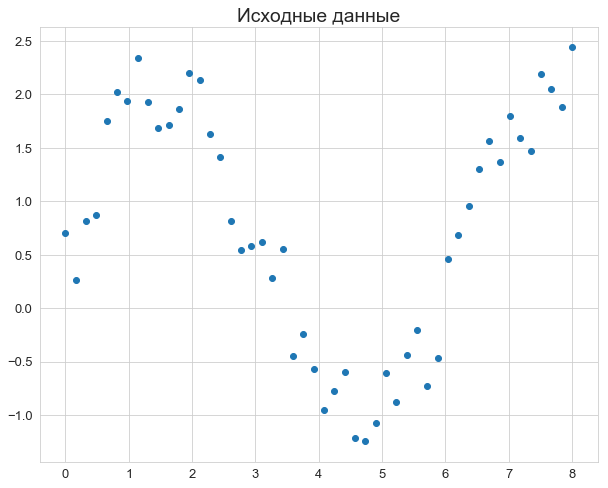

In [5]:
plt.scatter(X, y);
plt.title('Исходные данные');

---

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [7]:
clf = Pipeline([
    ('poly', PolynomialFeatures()),
    ('clf', LinearRegression())
])
clf.fit(X, y);

/Users/sandpiturtle/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


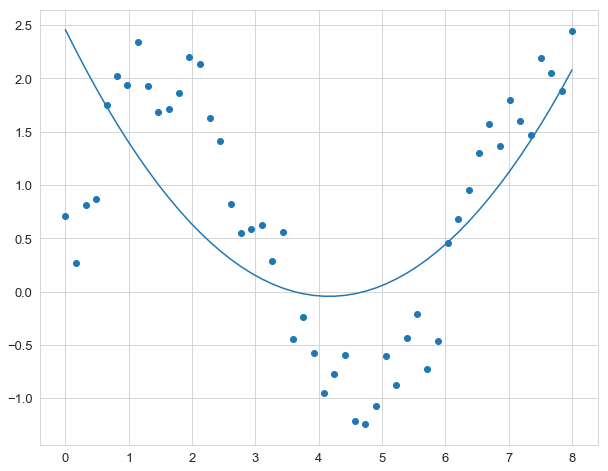

In [8]:
plt.scatter(X, y);
plt.plot(X, clf.predict(X));

---

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
params = {
    'poly__degree': [1,2,3,4,5,6,7],
}

In [11]:
gs = GridSearchCV(clf, params, cv=5)

gs.fit(X, y);

In [12]:
gs.best_params_

{'poly__degree': 5}

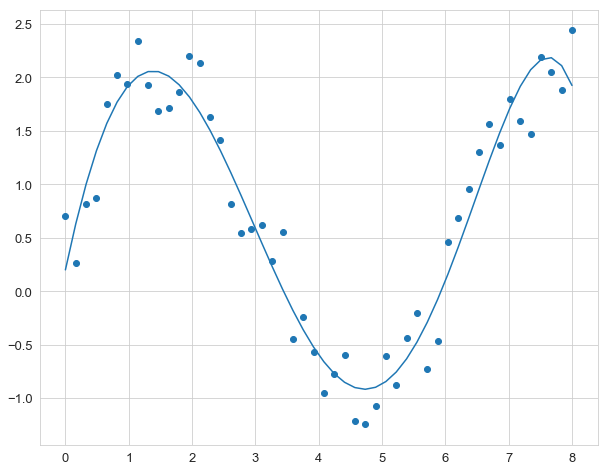

In [13]:
plt.scatter(X, y);
plt.plot(X, gs.best_estimator_.predict(X));